## Ford GoBike System Data:

## Introduction:

##### In this project we will look at the Ford GoBike System Data.This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in  jaunary 2019. The dataset can be downloaded from https://www.fordgobike.com/system-data. 
I will focus on these five questions. The first question is what the most day that people use a bike. The second question, What is the start time that people pick the bike. The third question is which days people use the bike for a long time. The fourth question is the top 5 station that is more people get the bike to go for a ride. The last question is looking for the customer and Subscriber which one of these two types will use the bike more frequency 









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import requests
import os
import time
import csv
from datetime import datetime



In [2]:
df = pd.read_csv('201901-fordgobike-tripdata.csv')

In [3]:
df.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
48856,812,2019-01-25 20:08:48.0890,2019-01-25 20:22:21.0470,16.0,Steuart St at Market St,37.794130,-122.394430,364.0,China Basin St at 3rd St,37.772000,-122.389970,4435,Subscriber,No
20968,2066,2019-01-29 17:42:55.1260,2019-01-29 18:17:21.1930,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,74.0,Laguna St at Hayes St,37.776435,-122.426244,4671,Subscriber,No
169334,273,2019-01-05 19:20:31.6140,2019-01-05 19:25:04.8200,90.0,Townsend St at 7th St,37.771058,-122.402717,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,1700,Subscriber,No
73220,1117,2019-01-23 08:49:33.9100,2019-01-23 09:08:10.9870,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,66.0,3rd St at Townsend St,37.778742,-122.392741,5298,Subscriber,No
121749,866,2019-01-14 15:19:56.9610,2019-01-14 15:34:23.0730,203.0,Webster St at 2nd St,37.795195,-122.273970,203.0,Webster St at 2nd St,37.795195,-122.273970,954,Subscriber,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21409,441,2019-01-29 17:47:20.1820,2019-01-29 17:54:41.5100,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2426,Subscriber,No
143043,264,2019-01-10 15:42:09.6120,2019-01-10 15:46:34.4650,163.0,Lake Merritt BART Station,37.797320,-122.265320,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,4495,Subscriber,No
53905,481,2019-01-25 11:09:16.9170,2019-01-25 11:17:18.0150,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,88.0,11th St at Bryant St,37.770030,-122.411726,4614,Subscriber,No
29453,106,2019-01-28 19:18:23.5920,2019-01-28 19:20:09.9370,321.0,5th St at Folsom,37.780146,-122.403071,47.0,4th St at Harrison St,37.780955,-122.399749,5367,Subscriber,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             192082 non-null  int64  
 1   start_time               192082 non-null  object 
 2   end_time                 192082 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   192082 non-null  float64
 6   start_station_longitude  192082 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     192082 non-null  float64
 10  end_station_longitude    192082 non-null  float64
 11  bike_id                  192082 non-null  int64  
 12  user_type                192082 non-null  object 
 13  bike_share_for_all_trip  192082 non-null  object 
dtypes: f

In [5]:
df.shape

(192082, 14)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


## Clean the data:

### Drop All Rows with any Null/NaN/NaT Values

In [7]:
df = df.dropna()

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             191834 non-null  int64  
 1   start_time               191834 non-null  object 
 2   end_time                 191834 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   191834 non-null  float64
 6   start_station_longitude  191834 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     191834 non-null  float64
 10  end_station_longitude    191834 non-null  float64
 11  bike_id                  191834 non-null  int64  
 12  user_type                191834 non-null  object 
 13  bike_share_for_all_trip  191834 non-null  object 
dtypes: f

### 1/convert start_time and end_time to datatime .
### 2/ convert start_station and end_station to string.

In [9]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)

### creat two colume one for the day and one for the hours

In [10]:

df['trip_day'] = df.start_time.dt.strftime('%a')
df['trip_hour'] = df.start_time.dt.strftime('%H')

In [31]:
df['trip_duration'] = df.start_time - df.end_time 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             191834 non-null  int64          
 1   start_time               191834 non-null  datetime64[ns] 
 2   end_time                 191834 non-null  datetime64[ns] 
 3   start_station_id         191834 non-null  object         
 4   start_station_name       191834 non-null  object         
 5   start_station_latitude   191834 non-null  float64        
 6   start_station_longitude  191834 non-null  float64        
 7   end_station_id           191834 non-null  object         
 8   end_station_name         191834 non-null  object         
 9   end_station_latitude     191834 non-null  float64        
 10  end_station_longitude    191834 non-null  float64        
 11  bike_id                  191834 non-null  int64          
 12  us

In [33]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,trip_day,trip_hour,trip_duration
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,Thu,17,-1 days +01:32:54.749000
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,Thu,20,-1 days +05:41:39.713000
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,Thu,18,-1 days +06:36:06.394000
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,Thu,19,-1 days +11:35:19.401000
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,Thu,14,-1 days +07:08:10.476000


## Visualisation 


### Univariate Exploration:

## 1/ what the most day that people use a bike?

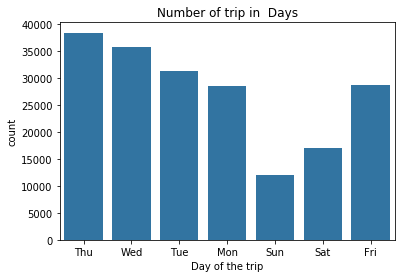

In [22]:
sns.countplot(data=df, x='trip_day', color=sns.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in  Days');

##### Looking for the above graph we can see that people use the bike in workdays more than weekend days. In addition, the most day that people go for a ride is Thursday and Wednesday.


## 2/ What is the start time that people pick the bike ?

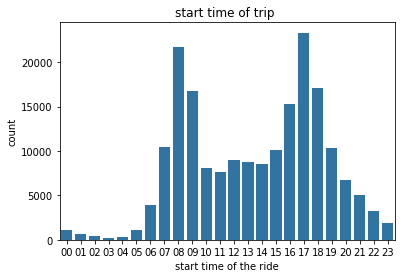

In [34]:
sns.countplot(data=df, x='trip_hour', color=sns.color_palette()[0]);
plt.xlabel('start time of the ride')
plt.title('start time of trip ');

##### Looking for the above graph we can see that people use to pike the bike at 8:00 am, in the morning or pick the pick at 5:00 pm, in the evening. It seems that people usually choose the bike going to jobs and then pick the bike to go back home.


### Bivariate Exploration:


## 3/ which days people use the bike for a long time?

Text(0, 0.5, 'Avg. Duration (s)')

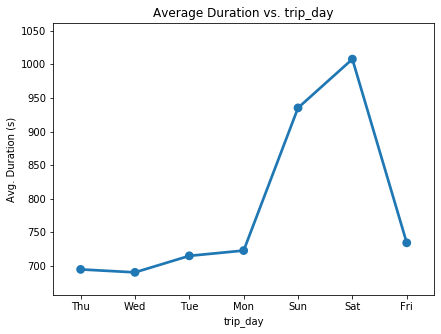

In [39]:
plt.figure(figsize = [15,5])
plt.subplot(1, 2, 1)
sns.pointplot(data=df, x='trip_day', y='duration_sec', errwidth=0)
plt.title('Average Duration vs. trip_day')
plt.xlabel('trip_day')
plt.ylabel('Avg. Duration (s)')


#### Looking at the duration in the second and the day, it seems that at the weekend people use the bike in a long time than the other days.

## 4/The top 5 station that is more people get the bike to go for a ride?

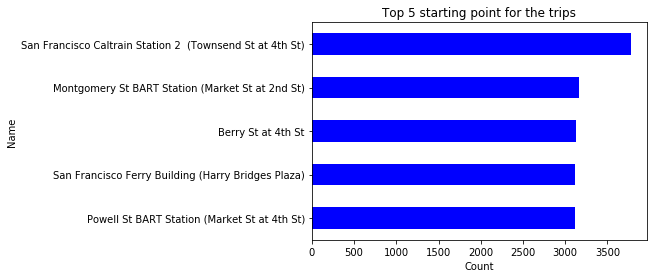

In [18]:
top_names = df.start_station_name.value_counts()[1:6].sort_values()
top_names.plot(kind = 'barh', color='blue')
plt.title('Top 5 starting point for the trips')
plt.xlabel('Count')
plt.ylabel('Name');

#### The graph shows the top 5 stations that people go to pick the bike. The best station was  San Francisco Caltrain Station 2. The fourth station shows in the graph have the same count of trips.

### Multivariate Exploration:


## 5/looking for the customer and Subscriber which one of these two types will use the bike more frequency?

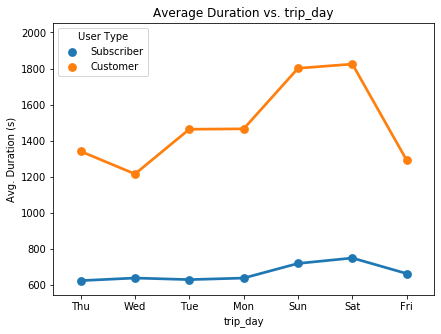

In [16]:
plt.figure(figsize = [15,5])
plt.subplot(1, 2, 1)
sns.pointplot(data=df, x='trip_day', y='duration_sec', hue='user_type', errwidth=0)
plt.title('Average Duration vs. trip_day')
plt.xlabel('trip_day')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')

#### It clear that the customer uses the bike more than people who have a subscriber. Also, we can conclude that the average duration of the rides is higher in customer than who have a subscriber.

## Summary:

In conclusion, we can see that people use the bike in workdays more than weekend days. Besides, the most day that people go for a ride is Thursday and Wednesday. Also, it seems that at the weekend people use the bike in a long time than the other days. It clear that the customer uses the bike more than people who have a subscriber. Also, we can conclude that the average duration of the rides is higher in customer than who have a subscriber. finally The best station was San Francisco Caltrain Station 2.
